# Quantum Mechanics : Solving Schrodinger Equation

## 1. Particle in a box

<p align="center">
   <img src="Particle_in_a_box.png" alt="Particle in a box" style="width:500px;"/>
</p>

A particle in a potential, $ V(x) = \begin{cases} 0, & \text{if} \hspace{0.2cm} 0\leq x \leq a \\ \infty, & \text{otherwise}\end{cases}$ is completely free, except at the two ends ( $x = 0$ and $x = a$), where an infinte force prevents it from escaping. 

To quote from '_Introduction to Quantum Mechanics - David Griffith_', "_I urge you to treat it with respect. Despite its simplicity-or rather, precisely because of its simplicity, it serves as a wonderfully accessible test case for all fancy machinery that comes later._"

Outside the well, $\psi(x) = 0$ (the probability of finding the particle there is zero). _Inside_ the well, where $V(x)=0$, the **time-independent Schrodinger equation** is given by

$\begin{equation}\frac{-\hbar^{2}}{2m} \frac{d^2\psi(x)}{dx^{2}} = E\psi(x) \end{equation}$

where, m is the mass of the particle, $\hbar = \frac{h}{2\pi}$ is reduced planck's constant and $E$ is the Energy eigen value.

Now, based on the above scenario we can use _python_ to solve the Schrodinger wave equation and visualise both the normalised wave function and its respective energy eigen values. This method of programming is called _numerical method_, where we use lists and while loops and iterate over and over.

In [1]:
# Libraries
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# Normalised constants 

hbar = 1 
m = 1
a = 1
V = 0


---
## Chapter - 1

Here, we will be implementling a numerical solution to one dimensional time-independent Schrodinger equation for a particle with energy $E$ in a potential $V(x)$. 

> **Initial conditions:**

    Let the initial conditions be,

        1. 'psi = 0': initial value of the wave function.
        2. 'dpsi = 1': initial value of the derivative of the wave function.
        3. 'x=0': initial position of the particle.
        4. 'dx = a*0.001': Step size for the numerical integration, where 'a' is the width of the box/ potential well.

> **Lists initialization:**

    1. 'xlist = []': An empty list to store the positions during the integration.
    2. 'psi_list = []': An empty list to store the values of the wave function during the integration.

> **Numerical Intergration loop:**

    - A 'while' loop runs until the position 'x' reaches the value of 'a'.
    - Inside the loop:
        1. 'ddpsi': Calculates the second derivative of the wave function using the Schrödinger equation.
        2. 'dpsi' and 'psi': Update the derivative and the wave function using the calculated second derivative.
        3. 'x': Update the position.
        4. Append 'x' and 'psi' to their respective lists for later plotting.
        5. Plot the current state of the wave function at each iteration.

---



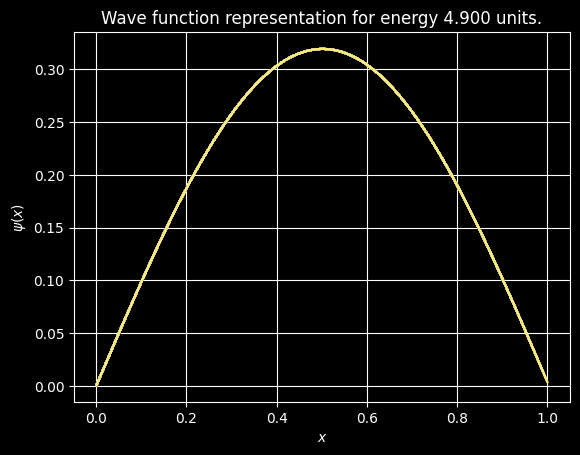

In [3]:
psi=0
dpsi=1
x=0
dx=a*0.001

xlist=[]
psi_list=[]

E= 4.9

plt.style.use('dark_background')
while x<=a:
    ddpsi=2*m/hbar**2*(V-E)*psi # Observe carefully, This is the time independent Schrodinger wave equation.
    dpsi=dpsi+ddpsi*dx
    psi=psi+dpsi*dx
    x=x+dx
    xlist.append(x)
    psi_list.append(psi)
    plt.plot(xlist,psi_list)

plt.title("Wave function representation for energy %.3f units."%(E))
plt.xlabel("$x$")
plt.ylabel("$\psi(x)$")
plt.grid()
plt.show()

---
## Chapter-2

Let us play with the above program.

> **Initialization** 
    
    1. 'E = 0': Initial energy guess.
    2. 'dE = 0.01': Step size for changing the energy in each iteration.
    3. 'dx = a*0.001': Step size for the numerical intergration, where 'a' is the width of the box.
    4. 'psi = 1': Initial value of the wave function.
    
>  **Energy Adjustment Loop**

    1. 'while abs(psi) > 0.001': Loops continues unitl the wave function is close to zero.
    2. Inside this loop:
        - Reset initial conditions for the wave function ('psi'), its derivative ('dpsi'), and position ('x').
        - Increment the energy ('E') by the step size ('dE').
        - Increment empty list 'xlist' and 'psi_list' to store position and wave function values.
    3. Numerical Integration loop:
        - 'while x<=a': Another loop for numerical intergration over position.
            -  Calculate the second derivative of the wave function using the Schrödinger equation.
            - Update the derivative and the wave function using the calculated second derivative.
            - Update the position.
            - Append position (x) and wave function (psi) to their respective lists.
                
---

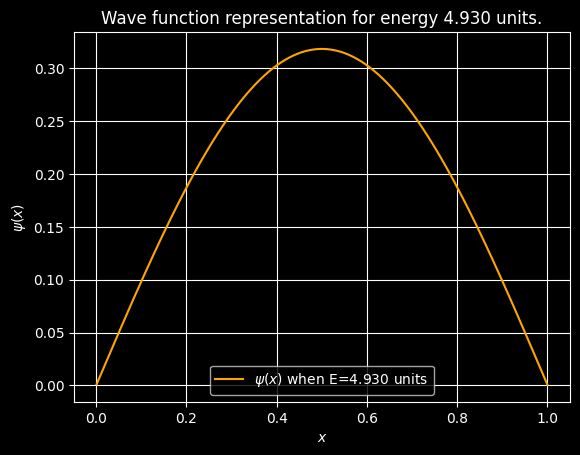

In [4]:

E = 0
dE = 0.01
dx = a*0.001
psi = 1 

plt.style.use('dark_background')
while abs(psi)>0.001: 
    psi = 0
    dpsi = 1
    x = 0
    E = E+dE
    xlist = []
    psi_list = []
    
    
    while x<= a:
        ddpsi = 2*m/hbar**2*(V-E)*psi
        dpsi = dpsi+ddpsi*dx
        psi = psi+dpsi*dx
        x = x+dx
        xlist.append(x)
        psi_list.append(psi)
        
plt.plot(xlist,psi_list,'orange',label=r'$\psi(x)$ when E=%.3f units'%E)
plt.title("Wave function representation for energy %.3f units."%(E))
plt.ylabel("$\psi(x)$")
plt.xlabel("$x$")
plt.legend()
plt.grid()       
plt.show()    


---

## Chapter-3

Now that we have gained some experience with setting the energy and calculating its respective wave function. This time we will calculate the Energy eigen values and eigen function by this iterative method.

> **Initialization:**

    1. 'E = 0': Initial energy guess.
    2. 'dE = 0.01': Step size for changing the energy in each iteration.
    3. 'dx = a * 0.001': Step size for the numerical integration over position, where 'a' is the width of the box.
    4. 'namx = 3': Maximum number of eigen functions to find.
    5. 'counter = 1': Counter to keep track of the number of eigen functions found.
    6. 'eigen_function = []': List to store the eigen functions.
    7. 'eigen_function_xlist = []': List to store the correspnding position values for each eigen functions.
    8. 'eigen_energies = []': List to store the eigen energies.

> **Main Loop:**

    1. 'while counter <= nmax:' Outer loop runs until the specified number of eigen functions ('nmax') is reached.
    2. Inside this loop:
        - Reset the initial conditions for the wave function ('psi'), its derivative ('dpsi'), and position ('x').
        - Increment the energy ('E')by the step size ('dE').
        - Initialize empty lists 'xlist' and 'psi_list' to store postion and wave function values.
        - **Energy Adjustment Loop**:
            - 'while abs(psi) > 0.001:' : Inner loop continues until the wave function is close to zero.
            - Inside this loop:
                - Numerically integrate the Schrodinger equation to find the wave function and its derivative.
                - Append position ('x') and wave function ('psi') to their respective lists.
        - Append the lists of positions, wave function and energies to the 'eigen_function_xlist.append([xlist])', 'eigen_function.append([psi_list])' and eigen_energies.append(E)'.
        - 'counter = counter + 1': Increase the counter, to keep track of wave functions.
        - 'E = E * 1.1': This is make sure we don't get same energy values. Hence the scaling factor $1.1$, but this doesn't effect the nature of the code.

---
 

In [6]:

E = 0
dE = 0.01
dx = a*0.001
nmax = 3
counter = 1
eigen_function = []
eigen_function_xlist = []
eigen_energies = []

while counter <= nmax:
    psi=1
        
    while abs(psi)>0.001: 
        psi = 0
        dpsi = 1
        x = 0
        E = E+dE
        xlist = []
        psi_list = []
        
        
        while x<= a:
            ddpsi = 2*m/hbar**2*(V-E)*psi
            dpsi = dpsi+ddpsi*dx
            psi = psi+dpsi*dx
            x = x+dx
            xlist.append(x)
            psi_list.append(psi)
    
    eigen_function.append([psi_list]) 
    eigen_function_xlist.append([xlist])
    eigen_energies.append(E)        
    counter = counter + 1
    E = E*1.1
    
            

  

In [23]:
eigen_energies

[4.929999999999939, 19.703000000000287, 44.333299999999475]

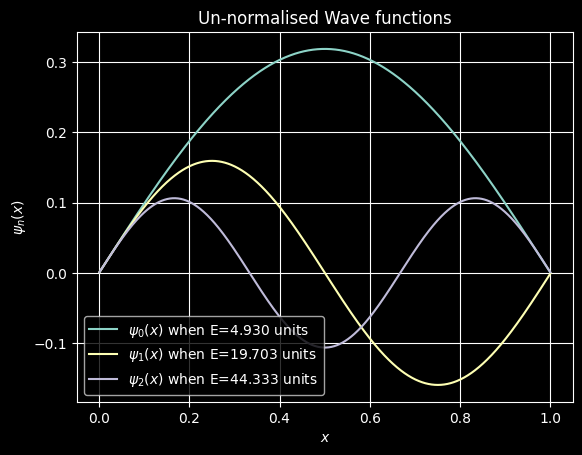

In [22]:
counter = 1
while counter<=nmax:
    plt.plot(xlist, eigen_function[counter-1][0],label="$\psi_{%d}(x)$ when E=%.3f units"%(counter-1,eigen_energies[counter-1]))
    counter=counter+1

plt.legend()
plt.title('Un-normalised Wave functions')
plt.ylabel("$\psi_{n}(x)$")
plt.xlabel("$x$")
plt.grid()
plt.show()

---
## Chapter - 4

---

In [ ]:
counter = 1

while counter <= nmax:
    norm = np.dot(
        eigen_function[counter-1][0],eigen_function[counter-1][0]
    )*dx
    eigen_function[counter-1][0][:]= [
        x/np.sqrt(norm) for x in eigen_function[counter-1][0]
    ]
    plt.plot(xlist,eigen_function[counter-1][0],
             label = f"$\psi_{{{counter}}}(x)$")
    counter = counter + 1
    
plt.legend()
plt.title("Normaised wave function")
plt.ylabel("$\psi_{n}(x)$")
plt.xlabel("$x$")
plt.grid()
plt.show()

In [ ]:
counter = 1

while counter <= nmax:
    eigen_function[counter-1][0][:]= [
        x + eigen_energies[counter-1] for x in eigen_function[counter-1][0]
    ]
    plt.plot(xlist,eigen_function[counter-1][0],
             label = f"$\psi_{{{counter}}}(x)$")
    counter = counter + 1
    
plt.legend()
plt.title("Normaised wave function")
plt.ylabel("$\psi_{n}(x)$")
plt.xlabel("$x$")
plt.grid()
plt.show()